In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ml-assignment-2-ques-3/Data.csv


# Importing data (csv)

In [2]:
data = pd.read_csv('../input/ml-assignment-2-ques-3/Data.csv') #reading csv into pandas dataframe

data_arr = np.array(data) #Converting into numpy array to carryout all operations in the form of numpy
#------------------------------------------------------------------------------
print(data.shape)
data.head()

(54, 2)


,X,Y
0,1.0,550
1,3.0,566
2,4.0,558
3,3.0,784
4,5.0,333


# Finding the threshold for meaningful labels (taking median)

In [3]:
threshold = np.quantile(data_arr[:,1],[0.5],axis=0)[0] #Calculting 50th percentile or median
print(threshold)

851.0


# Question 3.1 - 
- Create the labels from the given data. (Fix an appropriate threshold and consider Y > threshold as 1 otherwise 0)

In [4]:
labels = np.where(data_arr[:,1]>threshold,1,0) #If-else statement
labels = np.resize(labels,(len(labels),1))

## Dropping coninuous numerical variables from data & appending labels

In [5]:
data_arr_mod = np.resize(data_arr[:,0:-1], (len(data_arr),1)) #Dropping coninuous column from which target is created
data_arr_mod = np.append(data_arr_mod,labels,axis=-1) #Appedning labels

label_idx = data_arr_mod.shape[1]-1
print("Target Label idx : ",label_idx)

print(data_arr_mod.shape)
data_arr_mod[0:6]

Target Label idx :  1
(54, 2)


array([[1., 0.],
       [3., 0.],
       [4., 0.],
       [3., 0.],
       [5., 0.],
       [2., 1.]])

# Question 3.2 - 
- Plot the distribution of samples using the histogram.

## For feature X

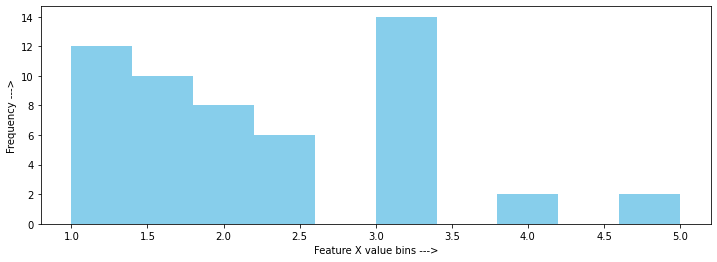

In [6]:
# plotting a line plot after changing it's width and height
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(4)

# naming the x and y axis
plt.xlabel('Feature X value bins --->')
plt.ylabel('Frequency --->')

#-------------------------------------------------------------------------------------
#Plotting
plt.hist(data_arr[:,0], color="skyblue")
plt.show()

## For Target-Y

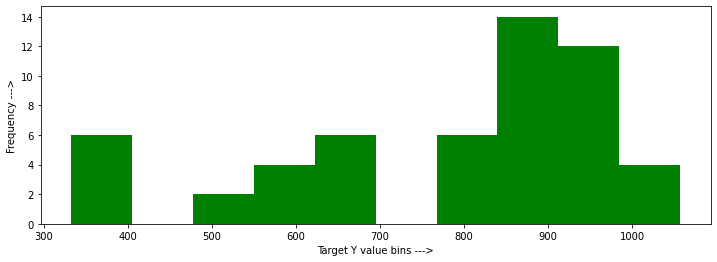

In [7]:
# plotting a line plot after changing it's width and height
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(4)

# naming the x and y axis
plt.xlabel('Target Y value bins --->')
plt.ylabel('Frequency --->')

#-------------------------------------------------------------------------------------
#Plotting
plt.hist(data_arr[:,1], color="green")
plt.show()

# Question 3.3 
- Determine the prior probability for both classes.

In [8]:
prior_0 = len(labels[labels==0])/len(labels)
print("Prior Probability of class 0 : ",prior_0)

#-------------------------------------------

prior_1 = len(labels[labels==1])/len(labels)
print("Prior Probability of class 1 : ",prior_1)


Prior Probability of class 0 :  0.5185185185185185
Prior Probability of class 1 :  0.48148148148148145


# Question 3.4 
- Determine the class conditional probabilities (likelihood) for the classes.

In [9]:
#UDF to calculate the pdf value with respect to gaussian assumption 
def gaussian_pdf(x,mu,sigma):
    
    pi = 3.14159
    val = (1/sigma) * np.sqrt((1/pi) * 0.5) * np.exp(-0.5 * (x-mu)/sigma)
    
    return val

#Testing for standard distribution with online calculator
gaussian_pdf(1,0,1)

0.2419708267111718

## Calculating class conditional probabilities for class 0 (for all records in feature X)

In [10]:
#Calculating class_conditional of feature X assuming Gaussian distibution (Continuous variable)
class_conditional_prob_0 = gaussian_pdf(data_arr_mod[:,0],                      #X-value   
                                      np.array([np.mean(data_arr_mod[data_arr_mod[:,label_idx]==0][:,0])]), #Mean
                                      np.array([np.std(data_arr_mod[data_arr_mod[:,label_idx]==0][:,0])]))  #Std Dev

#Resizing
class_conditional_prob_0 = np.resize(class_conditional_prob_0,
                                   (len(class_conditional_prob_0),1))

print(class_conditional_prob_0.shape)
class_conditional_prob_0[0:5]

(54, 1)


array([[0.76063481],
       [0.30217935],
       [0.19046232],
       [0.30217935],
       [0.12004756]])

## Calculating class conditional probabilities for class 1 (for all records in feature X)

In [11]:
#Calculating class_conditional of feature X assuming Gaussian distibution (Continuous variable)
class_conditional_prob_1 = gaussian_pdf(data_arr_mod[:,0],                      #X-value   
                                      np.array([np.mean(data_arr_mod[data_arr_mod[:,label_idx]==1][:,0])]), #Mean
                                      np.array([np.std(data_arr_mod[data_arr_mod[:,label_idx]==1][:,0])]))  #Std Dev

#Resizing
class_conditional_prob_1 = np.resize(class_conditional_prob_1,
                                   (len(class_conditional_prob_1),1))

print(class_conditional_prob_1.shape)
class_conditional_prob_1[0:5]

(54, 1)


array([[0.9948227 ],
       [0.23673815],
       [0.11548605],
       [0.23673815],
       [0.05633662]])

# Question 3.5 
- Plot the count of each unique element for each class.

Unique vals of class 0 :  7
Unique vals of class 1 :  5


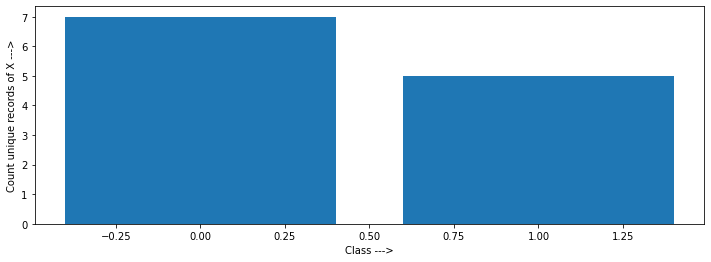

In [12]:
class_0_unique_vals = len(np.unique(data_arr_mod[data_arr_mod[:,label_idx]==0][:,0]))
print("Unique vals of class 0 : ",class_0_unique_vals)

class_1_unique_vals = len(np.unique(data_arr_mod[data_arr_mod[:,label_idx]==1][:,0]))
print("Unique vals of class 1 : ",class_1_unique_vals)


#-------------------------------------------------------------------------------------------
# plotting a line plot after changing it's width and height
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(4)

# naming the x and y axis
plt.xlabel('Class --->')
plt.ylabel('Count unique records of X --->')

#-------------------------------------------------------------------------------------
x = [0,1]
y = [class_0_unique_vals,class_1_unique_vals]
#Plotting
plt.bar(x=x,height=y)
plt.show()

# Question 3.6
- Calculate the posterior probability of both classes and plot them.

## Calculating the numerator for each class : prior * likelihood

In [13]:
numerator_0 = prior_0 * class_conditional_prob_0
print("Numerator of class 0 : ",numerator_0.shape)

numerator_1 = prior_1 * class_conditional_prob_1
print("Numerator of class 1 : ",numerator_1.shape)

Numerator of class 0 :  (54, 1)
Numerator of class 1 :  (54, 1)


## Calculating the evidence (denominator)

In [14]:
evidence = numerator_0 + numerator_1
print("Evidence : ",evidence.shape)

Evidence :  (54, 1)


## Calculating the posterior for class 0

In [15]:
posterior_0 = numerator_0/evidence

#-------------------------------------------------------
print("Posterior for class : ",posterior_0.shape)
posterior_0[0:5]

Posterior for class :  (54, 1)


array([[0.45157645],
       [0.57887917],
       [0.63978073],
       [0.57887917],
       [0.6964926 ]])

## Calculating the posterior for class 1

In [16]:
posterior_1 = numerator_1/evidence

#-------------------------------------------------------
print("Posterior for class : ",posterior_1.shape)
posterior_1[0:5]

Posterior for class :  (54, 1)


array([[0.54842355],
       [0.42112083],
       [0.36021927],
       [0.42112083],
       [0.3035074 ]])

## Verifying 

In [17]:
print("Verifying if all corresponding values add upto 1 (since probability is between [0,1]) - Unique values : ",
          np.unique(posterior_0 + posterior_1))

Verifying if all corresponding values add upto 1 (since probability is between [0,1]) - Unique values :  [1. 1.]


## Plotting posterior probabilities

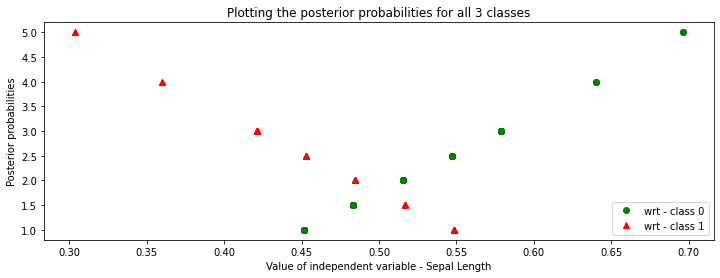

In [18]:
#-------------------------------------------------------------------------------------------
# plotting a line plot after changing it's width and height
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(4)

# naming the x and y axis
plt.xlabel('Class --->')
plt.ylabel('Count unique records of X --->')

#-------------------------------------------------------------------------------------
x = data_arr_mod[:,0]
y = [posterior_0,posterior_1]
plt.title("Plotting the posterior probabilities for all 3 classes")
plt.xlabel("Value of independent variable - Sepal Length")
plt.ylabel("Posterior probabilities")
#Plotting
plt.plot(posterior_0,x,marker='o',color='green',linestyle='none', label='wrt - class 0')
plt.plot(posterior_1,x,marker='^',color='red',linestyle='none', label='wrt - class 1')
plt.legend(loc="lower right")
plt.show()

# Classification 
- Taking decision based on posterior probabilities for class 0 & 1

In [19]:
combined_posterior = np.append(posterior_0,posterior_1,axis=-1)
print(combined_posterior[0:7])

predictions = np.argmax(combined_posterior,axis=-1)
predictions[0:7]

[[0.45157645 0.54842355]
 [0.57887917 0.42112083]
 [0.63978073 0.36021927]
 [0.57887917 0.42112083]
 [0.6964926  0.3035074 ]
 [0.5154789  0.4845211 ]
 [0.57887917 0.42112083]]


array([1, 0, 0, 0, 0, 0, 0])